정규분포(normal distribution) 혹은 가우스 정규분포(Gaussian normal distribution)라는 분포는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 많이 사용한다.

정규분포는 평균 μ와 분산 $σ^2$이라는 두 모수만으로 정의되며 확률밀도함수(pdf: probability density function)는 다음과 같은 수식으로 표현된다.

$$N(x;μ,σ^2)={1 \over {\sqrt{2\pi σ^2}}}\exp{-{(x-μ)^2} \over2σ^2 )}$$

분산의 역수를 정밀도(precision) β라고 부르기도 한다.

$$β={1 \over σ^2}$$

정규분포 중에서도 평균이 0이고 분산이 1인$ (μ=0, σ^2=1)$ 정규분포를 **표준정규분포(standard normal distribution)**라고 한다.

정규분포의 확률밀도함수는 다음과 같은 성질을 가진다.

1. x=μ일 때 확률밀도가 최대가 된다.

2. x=∞로 다가가거나 x=−∞로 다가갈수록 확률밀도가 작아진다.

# 사이파이를 사용한 정규분포의 시뮬레이션

사이파이의 stats 서브패키지에 있는 norm 클래스가 정규분포 클래스다. loc 인수로 기댓값 μ를 설정하고 scale 인수로 표준편차 $\sqrt{σ^2}$를 설정한다.

In [1]:
import scipy as sp
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.rc("font", size=10, family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

pdf() 메서드를 사용하면 확률밀도함수를 계산할 수 있다. 정규분포의 확률밀도함수는 종(bell) 모양의 부드러운 단봉분포다. 종의 아랫부분이 표준편차의 4배 이상이다.

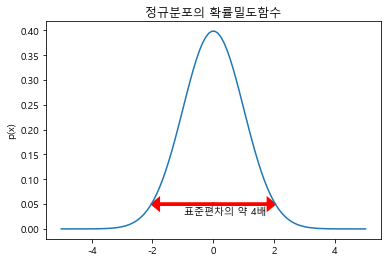

In [3]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, "표준편차의 약 4배")
plt.ylabel("p(x)")
plt.title("정규분포의 확률밀도함수")
plt.show()

시뮬레이션을 통해 표본을 얻으려면 rvs() 메서드를 사용한다.

In [4]:
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


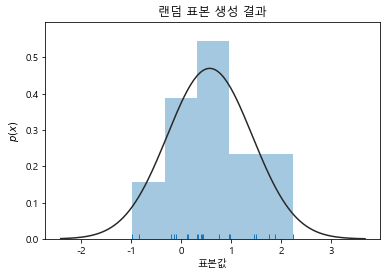

In [5]:
sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("$p(x)$")
plt.show()

# 예제: 붓꽃 데이터

D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


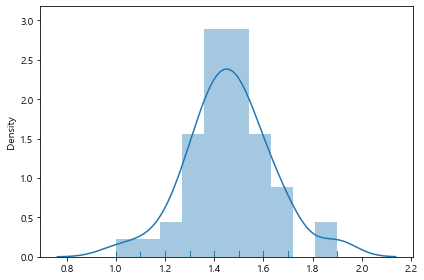

In [6]:
from sklearn.datasets import load_iris

setosa_sepal_length = load_iris().data[:50, 2]
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.show()

# 예제: 주식 수익률

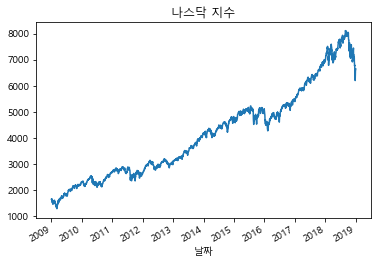

In [7]:
import pandas_datareader.data as web

symbol = "NASDAQCOM"
data = pd.DataFrame()
data[symbol] = web.DataReader(
    symbol, data_source="fred", start="2009-01-01", end="2018-12-31")[symbol]
data = data.dropna()
data.plot(legend=False)
plt.xlabel("날짜")
plt.title("나스닥 지수")
plt.show()

In [8]:
daily_returns = data.pct_change().dropna()
mean = daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print("평균 일간수익률: {:3.2f}%".format(mean * 100))
print("평균 일간변동성: {:3.2f}%".format(std * 100))

평균 일간수익률: 0.06%
평균 일간변동성: 1.17%


일간수익률의 분포를 히스토그램으로 나타냈다. 이 그림에서 다음과 같은 사실을 알 수 있다.

1.주식의 일간수익률은 단봉분포이고 대칭적인 정규분포와 비슷한 모양을 가진다.

2.주식 일간수익률은 0에 가까운 기댓값을 가진다.

3.일간수익률의 값이 0에 가깝더라도 양수라면 오랜 시간후에 엄청나게 높은 수익률을 보인다.

D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


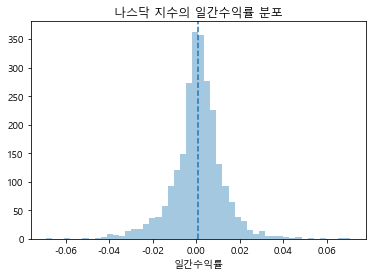

In [9]:
sns.distplot(daily_returns, kde=False)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls="--")
plt.ylim(0, ymax)
plt.title("나스닥 지수의 일간수익률 분포")
plt.xlabel("일간수익률")
plt.show()

# 로그정규분포

주가의 수익률이 정규분포라면 주가 자체는 어떤 분포가 될까? 이 경우 주가는 **로그정규분포(log-normal distribution)**가 된다. 로그정규분포는 데이터에 로그를 한 값 또는 변화율(수익률)이 정규분포가 되는 분포를 말한다. 로그정규분포를 띄는 데이터는 항상 양수다. 따라서 로그변환한 다음 사용하는 것이 일반적이다.

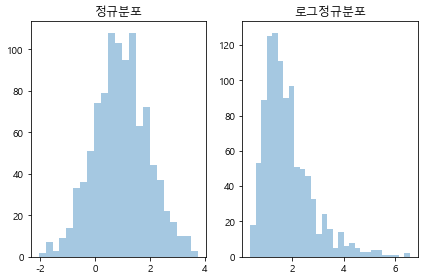

In [10]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2)
sns.distplot(x1, kde=False, ax=ax[0])
ax[0].set_title("정규분포")
sns.distplot(x2, kde=False, ax=ax[1])
ax[1].set_title("로그정규분포")
plt.tight_layout()
plt.show()

# Q-Q 플롯

정규분포는 여러 연속확률분포 중에서도 가장 널리 사용되는 확률분포다. 따라서 어떤 확률변수의 분포가 정규분포인지 아닌지 확인하는 것은 중요한 통계적 분석 중 하나다.

Q-Q(Quantile-Quantile) 플롯은 분석할 표본 데이터의 분포와 정규분포의 분포 형태를 비교하여 표본 데이터가 정규분포를 따르는지 검사하는 간단한 시각적 도구다. Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 데이터값을 한 쌍으로 만들어 그린 스캐터 플롯(scatter plot)이다. Q-Q 플롯을 그리는 방법은 다음과 같다(여기에서는 대략적인 방법론을 서술했으며 세부적인 사항은 다를 수 있다).



1.표본 데이터를 정렬(sort, ordering)한다.

2.하나하나의 표본 데이터가 전체 데이터 중의 몇 % 정도에 해당하는지 위칫값을 구한다. 위칫값으로는 특정 순위(order)의 값이 나타날 가능성이 높은 값을 뜻하는 순서통계량(order statistics)이라는 값을 이용한다.

3.각 표본 데이터의 위칫값이 정규분포의 누적확률함수(cdf) 값이 되는 표준 정규분포의 표본값을 구한다. 즉 확률값에 대한 누적확률함수의 역함수 값을 구한다. 이를 표본 정규분포의 분위함수(quantile function)값이라고 한다. 예를 들어 표본 정규분포의 1%의 분위함수값은 $F^−1$(0.01), 약 -2.326이다.

4. 정렬된 표본 데이터(ordered values)와 그에 대응하는 분위수(theoretical quantiles)를 하나의 쌍으로 간주하여 2차원 공간에 하나의 점(point)으로 그린다.

5. 모든 표본에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯을 완성한다.

정규분포를 따르는 데이터 표본을 Q-Q 플롯으로 그리면 다음과 같이 직선의 형태로 나타난다.

In [11]:
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [12]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [13]:
qf = rv.ppf(position)
qf

array([-0.8241636 , -0.38768012, -0.11829229,  0.08777425,  0.26091865,
        0.4142824 ,  0.55493533,  0.68726332,  0.81431072,  0.93841854,
        1.06158146,  1.18568928,  1.31273668,  1.44506467,  1.5857176 ,
        1.73908135,  1.91222575,  2.11829229,  2.38768012,  2.8241636 ])

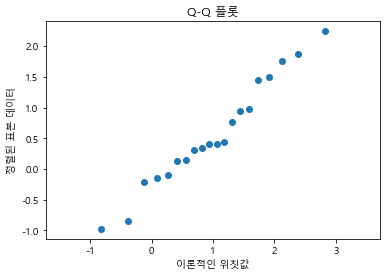

In [14]:
plt.scatter(qf, x_sorted)
plt.title("Q-Q 플롯")
plt.xlabel("이론적인 위칫값")
plt.ylabel("정렬된 표본 데이터")
plt.axis("equal")
plt.show()

정규분포를 따르지 않는 데이터 표본을 Q-Q 플롯으로 그리면 다음과 같이 직선이 아닌 휘어진 형태로 나타난다. 이 코드에서는 균일분포 데이터를 사용하였다. 이 균일분포 데이터는 0 이상 1 이하의 값만 가질 수 있기 때문에 세로축의 값이 이 구간내에 존재하게된다. 따라서 위아래로 제한된 형태의 휘어진 Q-Q 플롯이 나온다.

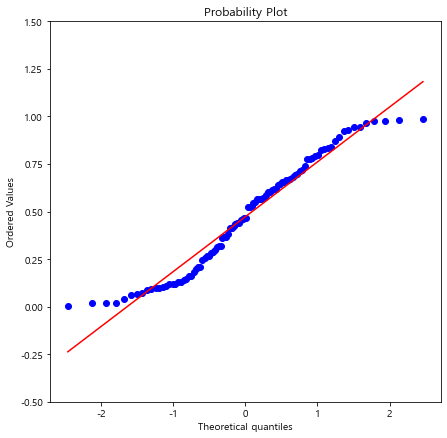

In [15]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

# 중심극한정리

실세계에서 발생하는 현상 중 많은 것들이 정규분포로 모형화 가능하다. 그 이유 중의 하나는 **중심극한정리(Central Limit Theorem)**다.

중심극한정리는 여러 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상을 말한다.중심극한정리를 수학적인 용어로 쓰면 다음과 같다.

X1,X2,…,XN가 기댓값이 μ이고 분산이 $σ^2$으로 동일한 분포(기댓값과 분산의 값이 동일할 뿐이며 분포의 모양은 달라도 된다)이며 서로 독립인 확률변수들이라고 하자. 분포가 어떤 분포인지는 상관없다.

X1,X2,…,XN에서 뽑은 각각의 표본 데이터 x1,x2,…,xN의 표본 평균

$$\overline{x}_N={1\over N}(x1+⋯+xN)$$

도 마찬가지로 예측할 수 없는 확률변수다. 이 확률변수를 $\overline{x}_N$이라고 하자.

개의 임의의 분포로부터 얻은 표본의 평균은 N이 증가할수록 기댓값이 μ, 분산이 ${σ^2 \over N} $인 정규분포로 수렴한다.

$$\overline{X}_N→ N(x;μ,{σ^2 \over N})$$

→  기호는 표본 개수 N이 커질수록 분포의 모양이 특정한 분포에 수렴한다는 것을 뜻한다. 이 표본 평균의 평균이 0, 분산이 1이 되도록 다음처럼 정규화를 하면 다음과 같이 쓸 수도 있다.

N개의 임의의 분포로부터 얻은 표본의 평균을 정규화하면 N이 증가할 수록 표준정규분포로 수렴한다.

$${\overline {X}_N −μ\over {σ \over \sqrt N}} → N(x;0,1)$$

시뮬레이션을 사용하여 중심극한정리가 성립하는지 살펴보도록 하자. 다음 시뮬레이션에서는 0부터 1까지의 균일 분포(uniform distribution)의 표본을 각각 1번, 2번, 10번 생성하여 그 합의 분포를 보았다. 여기에서는 0부터 1까지의 균일 분포의 기댓값이 ${1\over2}$, 분산이 ${1\over12}$라는 사실을 이용했다.

D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

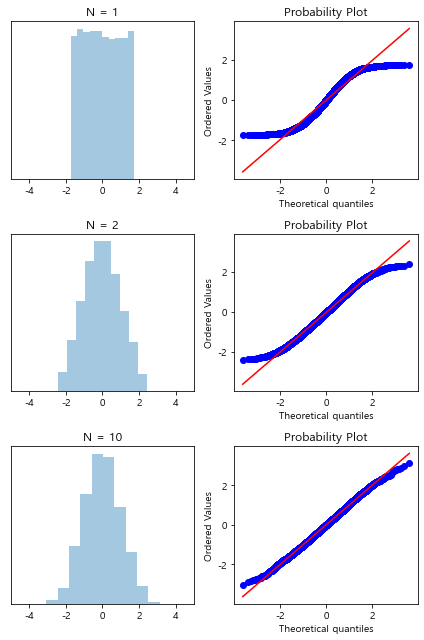

In [16]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()

더하는 분포의 수가 10개 정도가 되면 그 합은 정규분포에 상당히 가까워짐을 볼 수 있다.

# 정규분포의 통계량 분포

그렇다면 임의의 분포가 아닌 복수의 정규분포로부터 얻은 표본 데이터로 구한 표본평균은 어떤 분포를 가지게 될까?

N개의 정규분포로부터 얻은 표본의 합은 N과 상관없이 기댓값이 Nμ, 분산이 $Nσ^2$인 정규분포다.

$$xi∼N(μ,σ^2)→\displaystyle\sum_{i=1}^N  x_i \sim N(Nu,Nσ^2)$$

정규분포의 표본에 상수를 빼거나 곱해도 정규분포다. 이 경우에도 위와 같이 기댓값이 0, 표준편차가 1이 되도록 정규화를 하면 다음과 같이 쓸 수 있다.

$$x_i \sim N(Nu,Nσ^2) - > z={{\overline x - u} \over {σ \over \sqrt{N}}}$$

정규분포 표본의 평균을 정규화한 통계량을 z 통계량이라고 한다. 중심극한정리와 다른 점에 주의해야 한다. 중심극한정리에서는 표준정규분포로 점점 다가갈 뿐이고 표본 개수가 무한대가 되기 전에는 정확한 정규분포가 아니지만 z 통계량은 개수 N에 상관없이 항상 정확하게 표준정규분포이다.

# 선형회귀모형과 정규분포

정규분포는 선형회귀모형에서 잡음(disturbance)을 모형화하는데 사용된다. 선형회귀모형은 입력변수 x1,…,$x_N$이 종속변수 y에 선형적으로 영향을 미치는 모형이다.

$$y=w1x1+…+wNxN≈y$$

$$y=w1x1+…+wNxN+ϵ$$

ϵ은 잡음(disturbance)이라고 하며 우리가 값을 측정할 수 없는 양을 뜻한다. 예측값과 실제값의 차이를 뜻하는 잔차(residual)와는 다르다. 잡음은 선형회귀모형을 만들 때 하나하나의 영향력이 작거나 일일히 측정하기 힘들어서 무시하는 수많은 변수들의 영향을 하나로 합친 것이다. 즉 원래 y 값은 x1,…,xN,…의 거의 무한한 개수의 입력변수의 영향을 받는다.

하지만 이 중에서 입력변수 x1,…,xN만이 영향력이 크거나 측정이 쉽다면 다른 변수의 영향은 하나의 확률변수라고 합쳐서 표현할 수 있다.

중심극한정리에 의해 임의의 확률변수의 합은 정규분포와 비슷한 형태가 된다. 또한 ϵ의 기댓값이 0이 아니라면 다음처럼 상수항 w0=E[ϵ]을 추가하는 대신 ϵ의 기댓값이 0이라고 할 수 있기 때문에 잡음 ϵ이 기댓값이 0인 정규분포라고 가정하는 것은 합리적이다.

$$ϵ∼N(0,σ^2)$$